# Try MTS-GS (version 1.0) to do block-based change detection

In [1]:
# You can draw a polygon and detect weather it chanages in Beijing from 2017.06 to 2020.12


####################### requirements
# python 3.7

# os,datetime, math, pickle,operator,itertools
# pandas,numpy
# cv2,skimage,sklearn
# matplotlib,seaborn
# networkx
# earthengine, geemap

# our lib: MTS_GS_LIB.cp37-win_amd64, place it in the folder where this file resides 

# DATA IMPORT

In [2]:
from MTS_GS_LIB import dataCollection
from MTS_GS_LIB import MTS_GS_detection


In [3]:
import os
import ee

# 配置环境
# os.environ['HTTP_PROXY'] = 'http://127.0.0.1:7070'
# os.environ['HTTPS_PROXY'] = 'http://127.0.0.1:7070'
os.environ['HTTP_PROXY'] = 'http://127.0.0.1:1080'
os.environ['HTTPS_PROXY'] = 'http://127.0.0.1:1080'


# GEE授权、初始化
try:
    ee.Initialize()
except Exception as e:
    ee.Authenticate()
    ee.Initialize()


import geemap as geemap
Map = geemap.Map()


In [4]:
# load datacollection from GEE
collection = dataCollection()

('ImageNumber:', 43)
('date:', ['2017-06-07', '2017-07-07', '2017-08-06', '2017-09-20', '2017-10-30', '2017-11-14', '2017-12-19', '2018-01-13', '2018-02-07', '2018-03-24', '2018-04-08', '2018-05-23', '2018-06-07', '2018-06-27', '2018-08-21', '2018-09-05', '2018-10-30', '2018-11-09', '2018-12-29', '2019-01-23', '2019-02-17', '2019-03-24', '2019-04-03', '2019-05-13', '2019-06-22', '2019-07-12', '2019-08-31', '2019-09-25', '2019-10-25', '2019-11-19', '2019-12-04', '2020-01-23', '2020-02-22', '2020-03-13', '2020-04-22', '2020-05-12', '2020-06-01', '2020-06-21', '2020-08-10', '2020-09-19', '2020-10-24', '2020-11-08', '2020-12-03'])


In [5]:
Map = geemap.Map(center=[39.8953,116.1990], zoom=14)
Map.addLayer(ee.Image(collection.toList(500).get(11)),{'bands': ['B4','B3','B2'], 'min': 0, 'max': 3000}, 'RGB')                  
Map

Map(center=[39.8953, 116.199], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(chi…

# Before run MTS_GS, please draw a polygon on the map

load patch data....
patch data complete！
MTS-GS complete！

*********** show the result ***********

('est_change occurs in: ', [16, 38])


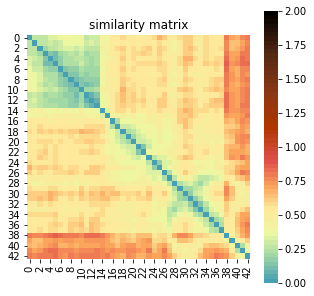

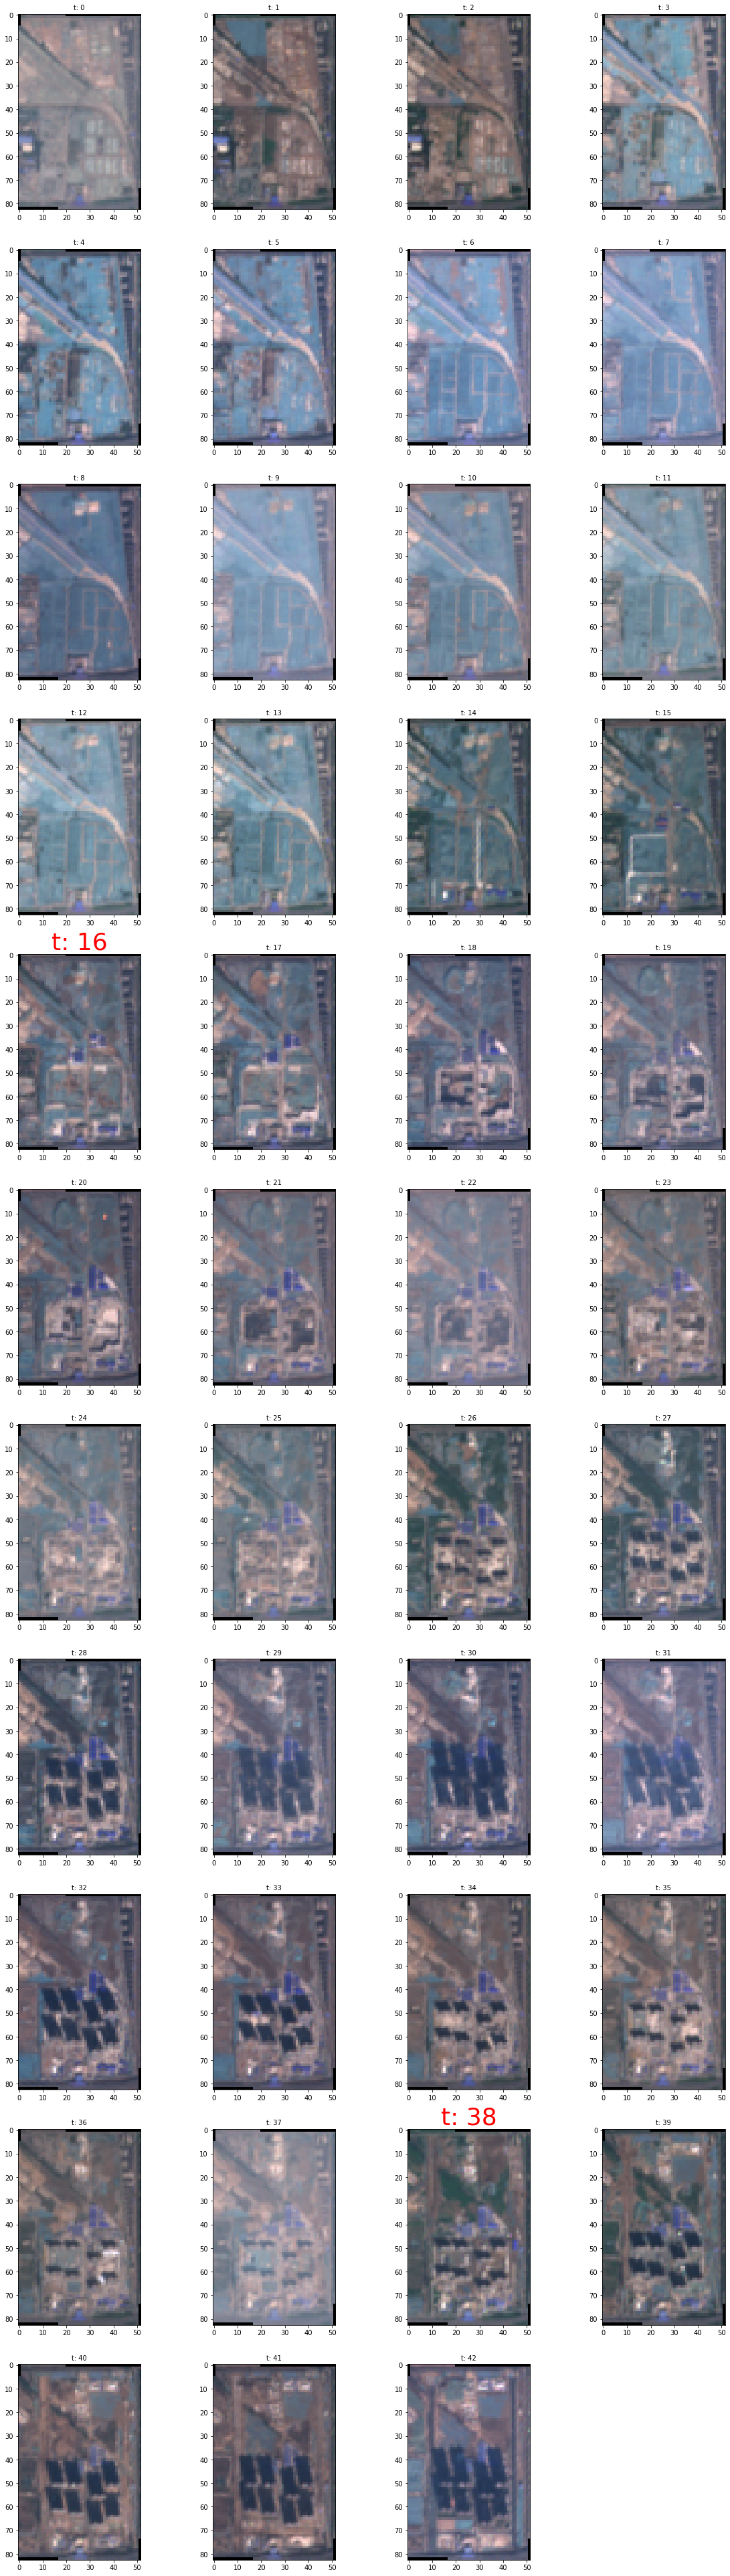

In [9]:
# RGB image and the detected change in larger red fonts  
similar_matrix,est_breaks = MTS_GS_detection(collection,Map.draw_last_feature)